In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
import joblib

In [3]:
df = pd.read_csv(r"D:\graduation 2\project grad linex\project\features\pair_pas_matrix.csv")

In [4]:
# فصل الميزات والتسميات (بدون حذف أعمدة غير موجودة)
X = df.drop(columns=["label"])
y = df["label"]


In [5]:
# 4. تقسيم البيانات (قبل SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [8]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [13]:
model = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42)

model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(n_estimators=500, random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='f1', verbose=2)
grid.fit(X_train, y_train)

print("✅ Best Params:", grid.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.9s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.8s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END class_weight=balanced, max_depth=None, min_sampl

In [16]:
val_pred = model.predict(X_val)
print("✅ Validation Set Evaluation:")
print("F1-score:", f1_score(y_val, val_pred))
print("ROC-AUC:", roc_auc_score(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))
print(classification_report(y_val, val_pred))


✅ Validation Set Evaluation:
F1-score: 0.7961165048543689
ROC-AUC: 0.6294784580498867
Confusion Matrix:
 [[19 26]
 [16 82]]
              precision    recall  f1-score   support

           0       0.54      0.42      0.47        45
           1       0.76      0.84      0.80        98

    accuracy                           0.71       143
   macro avg       0.65      0.63      0.64       143
weighted avg       0.69      0.71      0.70       143



In [17]:
test_pred = model.predict(X_test)
print("✅ Test Set Evaluation:")
print("F1-score:", f1_score(y_test, test_pred))
print("ROC-AUC:", roc_auc_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

✅ Test Set Evaluation:
F1-score: 0.8383838383838383
ROC-AUC: 0.7345804988662132
Confusion Matrix:
 [[28 17]
 [15 83]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        45
           1       0.83      0.85      0.84        98

    accuracy                           0.78       143
   macro avg       0.74      0.73      0.74       143
weighted avg       0.77      0.78      0.77       143



In [20]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC


In [21]:

print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

F1-score: 0.8383838383838383
ROC-AUC: 0.7998866213151927
Confusion Matrix:
 [[28 17]
 [15 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64        45
           1       0.83      0.85      0.84        98

    accuracy                           0.78       143
   macro avg       0.74      0.73      0.74       143
weighted avg       0.77      0.78      0.77       143



In [22]:
X_train.to_csv(r"D:\graduation 2\project grad linex\project\models\randomforest\X_train.csv", index=False)
X_val.to_csv(r"D:\graduation 2\project grad linex\project\models\randomforest\X_val.csv", index=False)
X_test.to_csv(r"D:\graduation 2\project grad linex\project\models\randomforest\X_test.csv", index=False)
y_train.to_csv(r"D:\graduation 2\project grad linex\project\models\randomforest\y_train.csv", index=False)
y_val.to_csv(r"D:\graduation 2\project grad linex\project\models\randomforest\y_val.csv", index=False)
y_test.to_csv(r"D:\graduation 2\project grad linex\project\models\randomforest\y_test.csv", index=False)

joblib.dump(model, r"D:\graduation 2\project grad linex\project\models\randomforest\randomforest_model.pkl")
print("✅ تم حفظ النموذج والبيانات بنجاح.")

✅ تم حفظ النموذج والبيانات بنجاح.


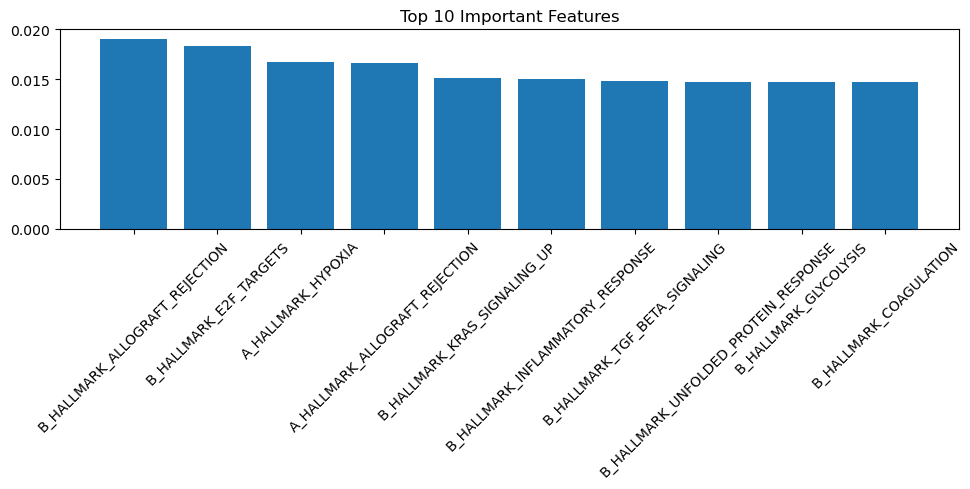

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# عرض أهم 10 مميزات
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
features = X.columns[indices]

plt.figure(figsize=(10, 5))
plt.title("Top 10 Important Features")
plt.bar(features, importances[indices])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
